# **[Data4Life] - Introduction to Data Science**
Topic ***NBA*** - Group ***13***

### **Import Modules**

In [1]:
# Packages for data manipulation
import pandas as pd

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for data preprocessing
from sklearn.preprocessing import StandardScaler

# Packages for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **Load datasets**

In [2]:
player_stats_per_game = pd.read_csv(filepath_or_buffer='final_data/player_stats_per_game.csv')
player_stats_per_game.head()

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name
0,2020-21,Miami Heat,PF,61.0,4.0,12.1,2.0,3.7,0.544,0.0,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,Precious Achiuwa
1,2021-22,Toronto Raptors,C,73.0,28.0,23.6,3.6,8.3,0.439,0.8,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,Precious Achiuwa
2,2022-23,Toronto Raptors,C,55.0,12.0,20.7,3.6,7.3,0.485,0.5,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,Precious Achiuwa
3,2023-24,Total,PF,74.0,18.0,21.9,3.2,6.3,0.501,0.4,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,Precious Achiuwa
4,2023-24,Toronto Raptors,C,25.0,0.0,17.5,3.1,6.8,0.459,0.5,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,Precious Achiuwa


### **Pre-processing data**

In [3]:
player_stats_per_game['pos'] = player_stats_per_game['pos'].str[-1]
player_stats_per_game.head()

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name
0,2020-21,Miami Heat,F,61.0,4.0,12.1,2.0,3.7,0.544,0.0,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,Precious Achiuwa
1,2021-22,Toronto Raptors,C,73.0,28.0,23.6,3.6,8.3,0.439,0.8,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,Precious Achiuwa
2,2022-23,Toronto Raptors,C,55.0,12.0,20.7,3.6,7.3,0.485,0.5,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,Precious Achiuwa
3,2023-24,Total,F,74.0,18.0,21.9,3.2,6.3,0.501,0.4,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,Precious Achiuwa
4,2023-24,Toronto Raptors,C,25.0,0.0,17.5,3.1,6.8,0.459,0.5,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,Precious Achiuwa


### **Retrieve important features**

In [4]:
stats = player_stats_per_game.loc[:, ['fg%', 'ft%', '2p%', 'trb', 'tov']]
stats

,fg%,ft%,2p%,trb,tov
0,0.544,0.509,0.546,3.4,0.7
1,0.439,0.595,0.468,6.5,1.2
2,0.485,0.702,0.564,6.0,1.1
3,0.501,0.616,0.562,6.6,1.1
4,0.459,0.571,0.528,5.4,1.2
...,...,...,...,...,...
5025,0.652,0.789,0.656,7.2,1.1
5026,0.626,0.727,0.626,8.5,1.5
5027,0.634,0.697,0.637,9.9,1.5
5028,0.649,0.723,0.649,9.2,1.2


### **Correlation between features**

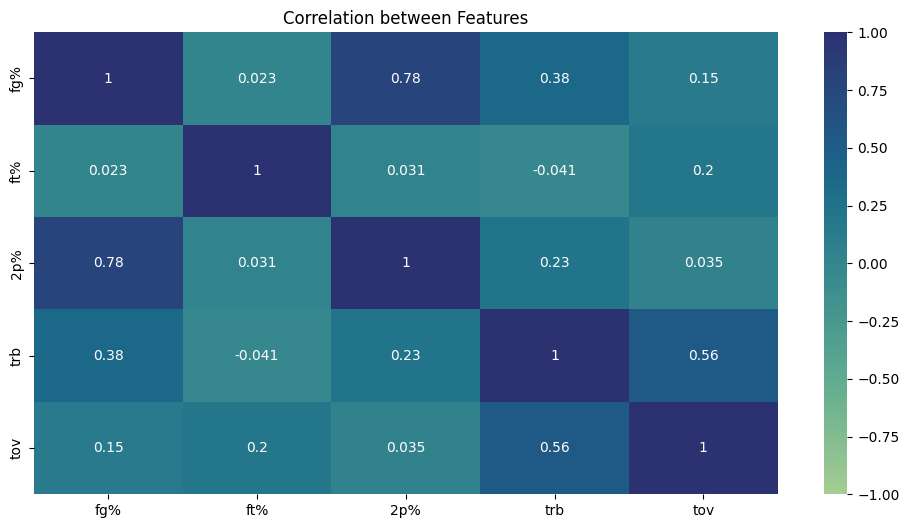

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=stats.corr(), vmin=-1, vmax=1, cmap='crest', annot=True)
plt.title(label='Correlation between Features')
plt.show()

### **DROP MISSING VALUES**

In [6]:
stats.isna().sum()

fg%     27
ft%    214
2p%     60
trb      0
tov      0
dtype: int64

In [7]:
stats.dropna(inplace=True)
stats.isna().sum()

fg%    0
ft%    0
2p%    0
trb    0
tov    0
dtype: int64

### **DROP DUPLICATE ROWS**

In [8]:
stats.duplicated().sum()

np.int64(6)

In [9]:
stats.drop_duplicates(inplace=True)
stats.duplicated().sum()

np.int64(0)

### **SCALE DATA**

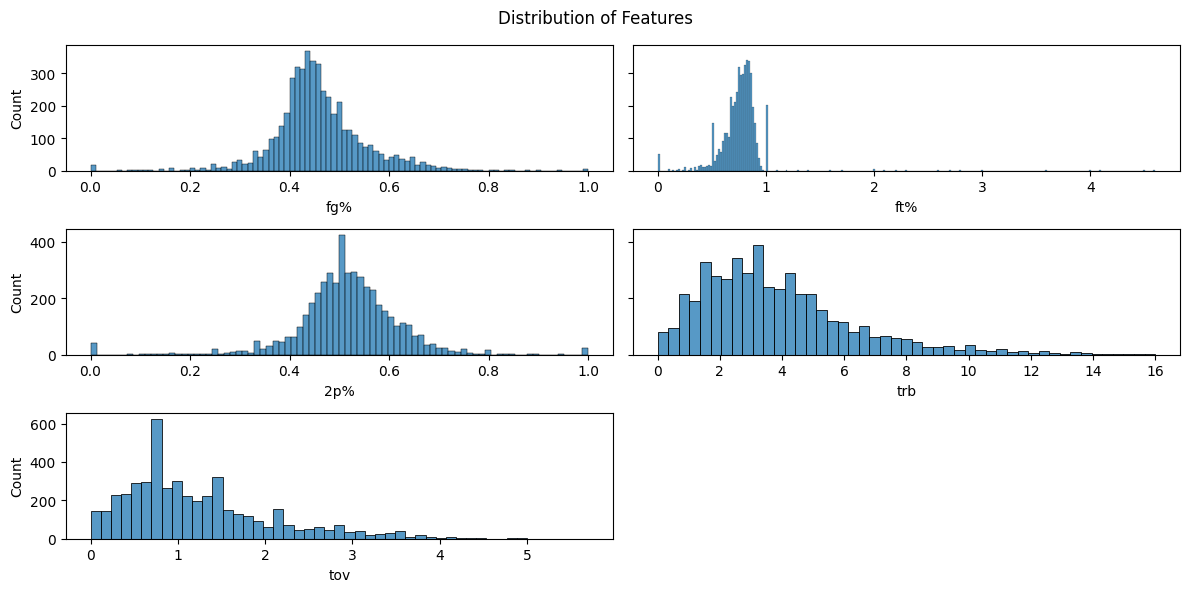

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6), sharey='row')
sns.histplot(data=stats['fg%'], ax=axes[0][0])
sns.histplot(data=stats['ft%'], ax=axes[0][1])
sns.histplot(data=stats['2p%'], ax=axes[1][0])
sns.histplot(data=stats['trb'], ax=axes[1][1])
sns.histplot(data=stats['tov'], ax=axes[2][0])
axes[2][1].set_visible(False)
plt.suptitle(t='Distribution of Features')
plt.tight_layout()
plt.show()

**Rationale for scaling data:**
- The `trb` columns has a different scale compared to the other columns, so scaling the data reduces the sum of squared distances between data points and their centroids, which helps avoid distorting the clustering process.
- We opted to use `StandardScaler` instead of `MinMaxScaler` because the distribution of these columns align with **normal distribution**.

In [11]:
stats_scaled = StandardScaler().fit_transform(stats)
stats_scaled

array([[ 0.93824346, -1.16834129,  0.27122421, -0.18430663, -0.61097756],
       [-0.19781524, -0.75783959, -0.46099077,  1.05825525, -0.02783248],
       [ 0.29988667, -0.24709909,  0.4401969 ,  0.85784204, -0.14446149],
       ...,
       [ 1.91200807, -0.27096547,  1.12547503,  2.42106505,  0.32205457],
       [ 2.07430217, -0.1468603 ,  1.23812349,  2.14048656, -0.02783248],
       [ 1.69561594, -1.10151543,  0.90956549,  3.46321372,  0.78857063]],
      shape=(4798, 5))

## **DATA MODELING**

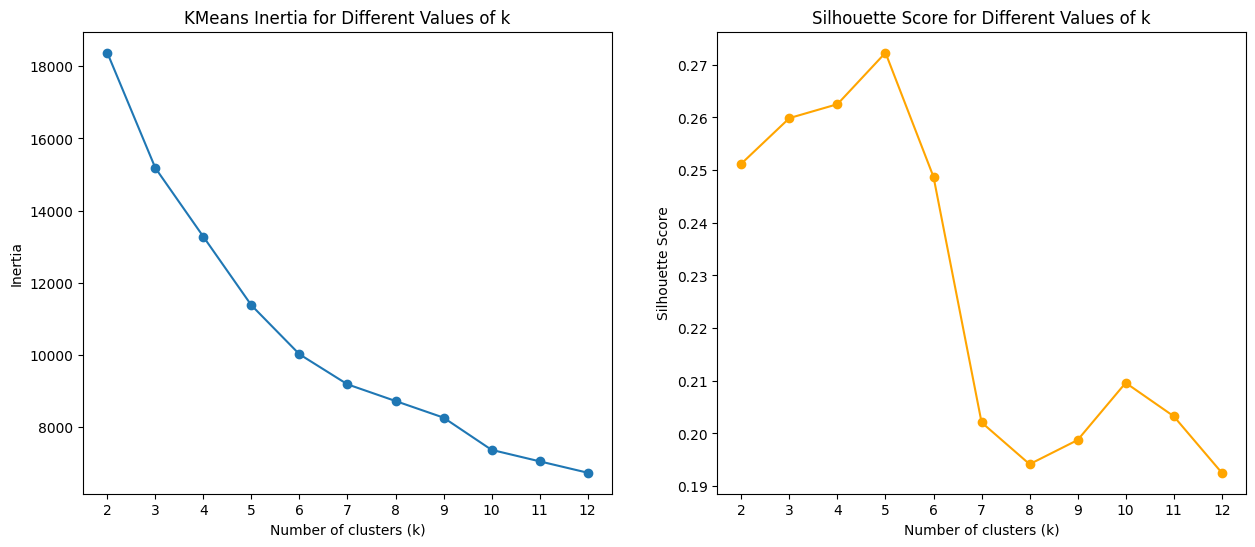

In [12]:
inertias = []
silhouette_scores = []
k_values = range(2, 13)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=1000)
    cluster_labels = kmeans.fit_predict(stats_scaled)
    silhouette_scores.append(silhouette_score(stats_scaled, cluster_labels))
    inertias.append(kmeans.inertia_)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes[0].plot(k_values, inertias, marker='o')
axes[0].set_title('KMeans Inertia for Different Values of k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_xticks(ticks=k_values)

axes[1].plot(k_values, silhouette_scores, marker='o', color='orange')
axes[1].set_title('Silhouette Score for Different Values of k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(ticks=k_values)

plt.show()

**COMMENTS**
- The analysis of `inertia` and `silhouette score` indicates that the best number of clusters is **5**.

In [13]:
forward_kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000)
forward_cluster_labels = forward_kmeans.fit_predict(stats_scaled)
stats['cluster'] = forward_cluster_labels
stats['cluster'].value_counts()

cluster
1    2463
4    1088
0     799
2     433
3      15
Name: count, dtype: int64

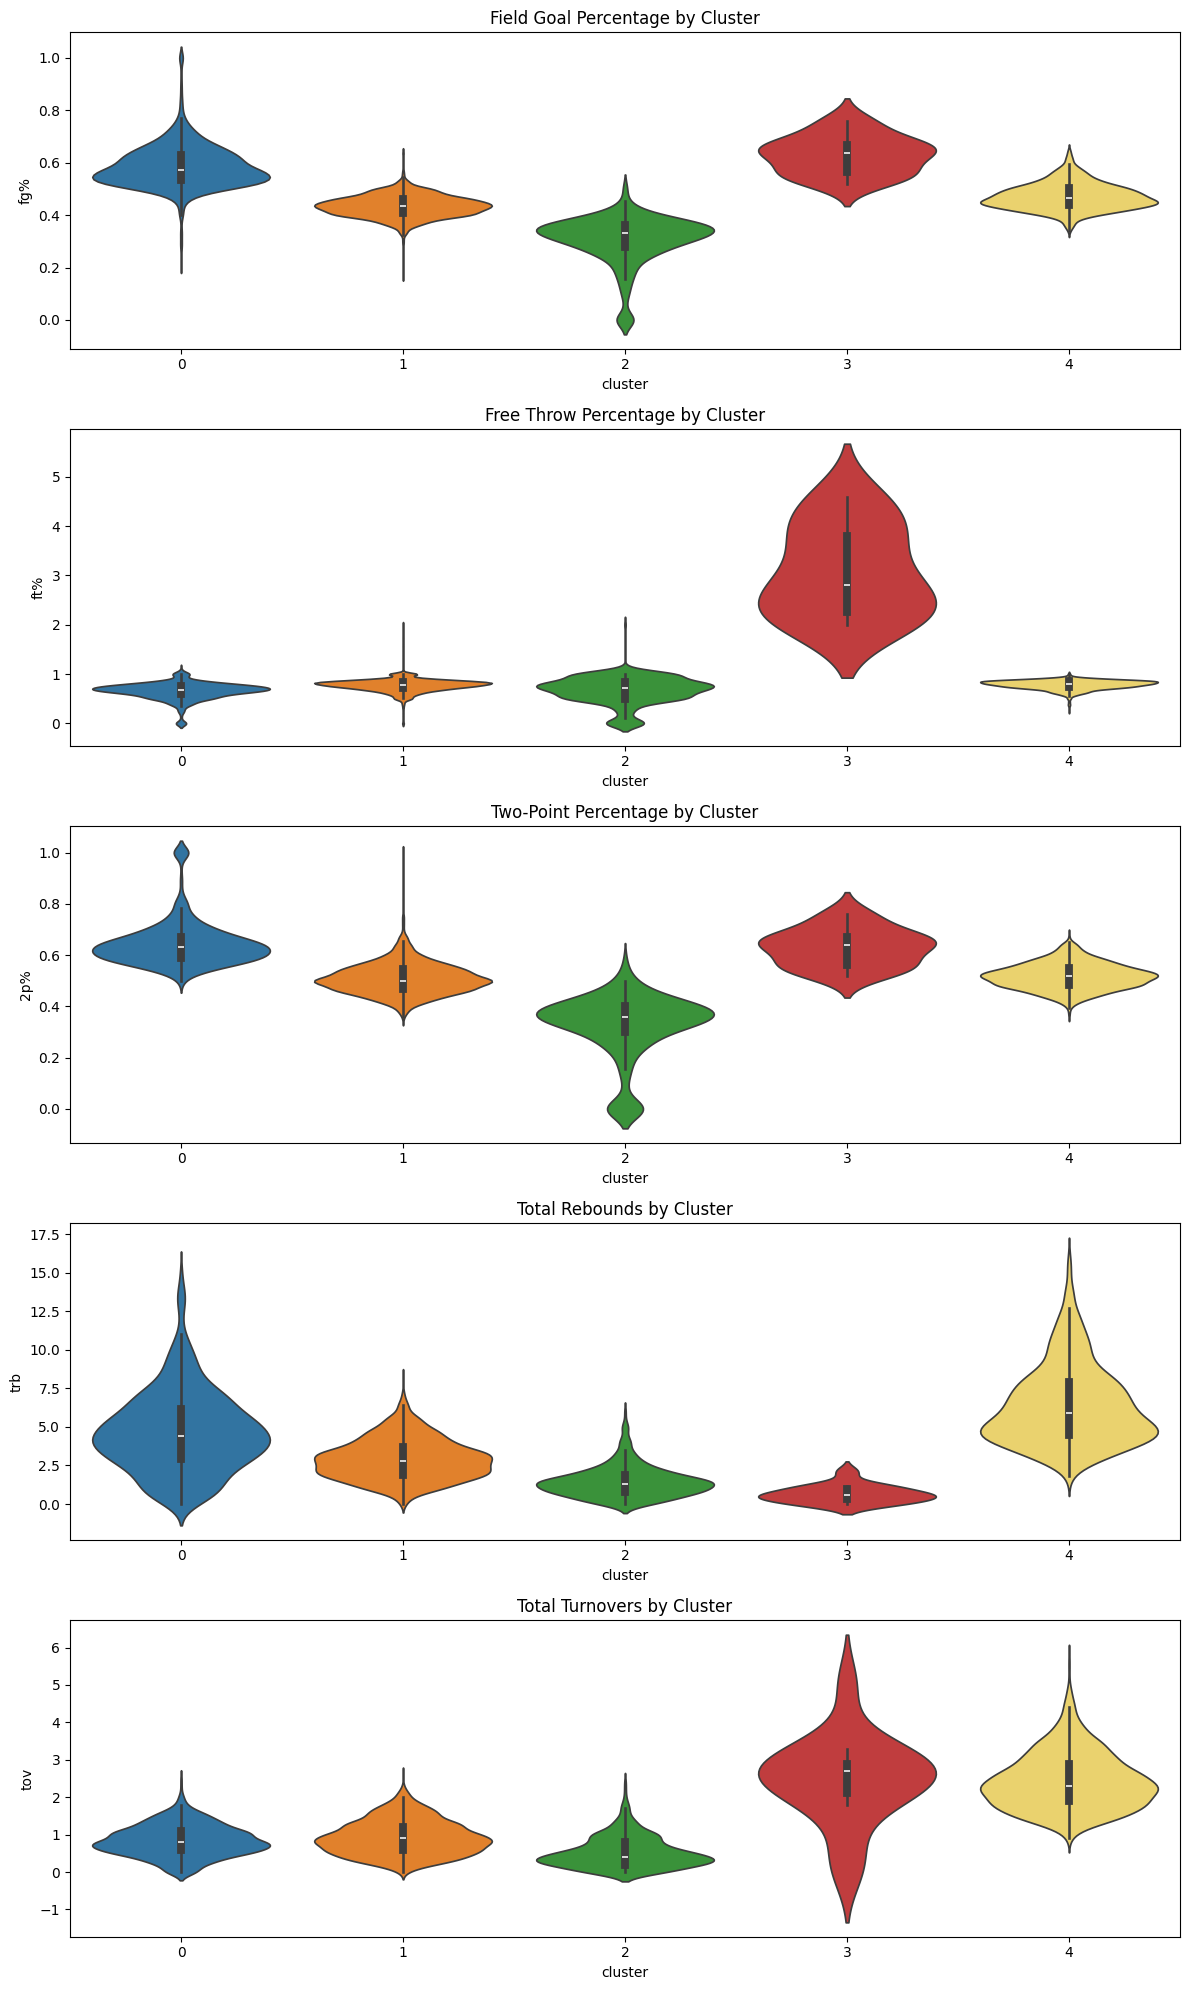

In [14]:
forward_cluster_colors = {0: '#1f77b4',  # Blue
                          1: '#ff7f0e',  # Orange
                          2: '#2ca02c',  # Green
                          3: '#d62728',  # Red
                          4: '#ffde59'}  # Yellow

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))

sns.violinplot(x=stats['cluster'], y=stats['fg%'], palette=forward_cluster_colors, hue=stats['cluster'], legend=False, ax=axes[0])
axes[0].set_title('Field Goal Percentage by Cluster')
axes[0].set_ylabel('fg%')

sns.violinplot(x=stats['cluster'], y=stats['ft%'], palette=forward_cluster_colors, hue=stats['cluster'], legend=False, ax=axes[1])
axes[1].set_title('Free Throw Percentage by Cluster')
axes[1].set_ylabel('ft%')

sns.violinplot(x=stats['cluster'], y=stats['2p%'], palette=forward_cluster_colors, hue=stats['cluster'], legend=False, ax=axes[2])
axes[2].set_title('Two-Point Percentage by Cluster')
axes[2].set_ylabel('2p%')

sns.violinplot(x=stats['cluster'], y=stats['trb'], palette=forward_cluster_colors, hue=stats['cluster'], legend=False, ax=axes[3])
axes[3].set_title('Total Rebounds by Cluster')
axes[3].set_ylabel('trb')

sns.violinplot(x=stats['cluster'], y=stats['tov'], palette=forward_cluster_colors, hue=stats['cluster'], legend=False, ax=axes[4])
axes[4].set_title('Total Turnovers by Cluster')
axes[4].set_ylabel('tov')

plt.tight_layout()
plt.show()

### **RECOMMENDATIONS**
- **Cluster 0 (Strong Performance):**
    - Despite the high two-point percentage, the free throw percentage is notably low. Therefore, players in this group need to dedicate more time to improving their free throw skills.
    - Furthermore, rebounding skills are slightly below the acceptable standard, so enhancing this area should also be a priority.

- **Cluster 1 (Average Peformance):**
    - Players in this group show steady average peformance accross various metrics, with a reasonable turnover rate.
    - As a result, they require comprehensive training to enhance all their skills.

- **Cluster 2 (Developing Performance):**
    - Players in this group need to prioritize fundamental skills initially, followed by particular offensive and defensive techniques.
    - If there is no improvement in performance, the players may face removal from the team.

- **Cluster 3 (Elite Performance):**
    - Players in this group demonstrate very high skill levels.
    - However, they struggle with rebounding and have a high turnover rate, resulting in 2 recommendations:
        - Players should focus on improving their jumping and ball-handling skills, and decision-making.
        - Teams might consider recruiting taller players.

- **Cluster 4 (Excellent Performance):**
    - Although rebounding ability is strong, minimizing turnover rate is their main focus.
    - Additionally, they require more practice to improve their scoring skills.